# Python Libs

In [174]:
import gluoncv as gcv
import mxnet as mx
# mxnet NDarray 
from mxnet import nd

# MXNet Gluon Neural network layers.
from mxnet.gluon import nn

# optional for displaying the image
import matplotlib.pyplot as plt
#import numpy as np
import os
import math

# Rotate Matrix

In [175]:
def build_rot_matrix(angle):
    
    # calculate terms
    a = math.cos(x)
    b = -math.sin(x)
    c = math.sin(x)
    d = math.cos(x)

    # build nd array
    nd_array = nd.array([
        [a,b],
        [c,d]
    ])
    
    return nd_array

#### rotate 0 matrix

In [176]:
x=0

rotate_0 = build_rot_matrix(x)
print('rotate by 0 nd array is ', rotate_0)

rotate by 0 nd array is  
[[ 1. -0.]
 [ 0.  1.]]
<NDArray 2x2 @cpu(0)>


#### rotate 45 matrix

In [177]:
x=0.25*math.pi

rotate_45 = build_rot_matrix(x)
print('rotate by 45 nd array is ', rotate_45)

rotate by 45 nd array is  
[[ 0.70710677 -0.70710677]
 [ 0.70710677  0.70710677]]
<NDArray 2x2 @cpu(0)>


#### rotate 90 matrix

In [178]:
x=0.5*math.pi

rotate_90 = build_rot_matrix(x)
print('rotate by 90 nd array is ', rotate_90)

rotate by 90 nd array is  
[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
<NDArray 2x2 @cpu(0)>


#### rotate 180 matrix

In [179]:
x=math.pi

rotate_180 = build_rot_matrix(x)
print('rotate by 180 nd array is ', rotate_180)

rotate by 180 nd array is  
[[-1.0000000e+00 -1.2246469e-16]
 [ 1.2246469e-16 -1.0000000e+00]]
<NDArray 2x2 @cpu(0)>


# Generic Rotate Routine

In [180]:
def my_print(verbose=False, *args):
    if (verbose):
        print(args)

In [182]:
# TODO: make blanks be an enum
def make_square(input_image_batch, blanks=0, verbose=False):
    # NDArrayIter(data, label=None, batch_size=1, shuffle=False, 
    #            last_batch_handle='pad', data_name='data', 
    #            label_name='softmax_label')
    #
    # Ignore the label parameter.
    dataiter = mx.io.NDArrayIter(input_image_batch, batch_size=1, shuffle=False, last_batch_handle='discard')
    for batch in dataiter:

        my_print(verbose, 'loop entry - a single batch - a single image in batch.data[0] from what is in in_data')
        
        
        # Does this copy or get an alias to the input image?
        a_img_batch = batch.data[0]
        my_print(verbose, 'a_img_batch = ', a_img_batch)
        my_print(verbose, 'a_img_batch.shape = ', a_img_batch.shape)

        (num_rows, num_cols) = in_img_batch[0].shape
        
        rect_dim = max(num_rows,num_cols)

        # I need a 0 when its 2x3
        # I need a 1 when its 3x2
        #
        # By extensions, I need a 1 when num_rows > num_cols
        #
        # I don't know any other way to do this.
        if num_rows > num_cols:
            mod_axis = 1
        else:
            mod_axis = 0


        #
        # pad only works with 4-d and 5d?
        #
        # nd.pad(in_img, mode='constant', constant_value=0,pad_width=(rect_dim,rect_dim))
        #

        new_vals = nd.zeros(rect_dim)

        #new_vals2 = nd.expand_dims(new_vals,axis=1) # 3x2 works
        #new_vals2 = nd.expand_dims(new_vals,axis=0) # 2x3 works
        new_vals2 = nd.expand_dims(new_vals,axis=mod_axis) 

        #nd.concat(in_img, new_vals2, dim=1) # 3x2 works
        #nd.concat(in_img, new_vals2, dim=0) # 2x3 works

        
        #
        # Don't know how to do this without a loop either
        #
        # There is a contrib api called nd.contrib.while_loop()
        #

        out_img = in_img_batch[0]
        
        the_diff = abs(num_rows - num_cols)
        print("the_diff = ", the_diff)
        while (the_diff > 0):
            
            # if blanks = 0, append blank lines to bottom
            # ......... = 1, prepend ....
            # ......... = 2, alternate 
            
            if (0 == blanks):
                out_img = nd.concat(out_img, new_vals2, dim=mod_axis) 
            
            if (1 == blanks):
                out_img = nd.concat(new_vals2, out_img,dim=mod_axis) 
            
            if (2 == blanks):
                # alternate the appends front and back
                if (the_diff % 2 == 0):
                    out_img = nd.concat(out_img, new_vals2, dim=mod_axis) 
                else:
                    out_img = nd.concat(new_vals2, out_img,dim=mod_axis) 
            
            
            
            the_diff = the_diff - 1
        
        
        out_img_batch = out_img.expand_dims(axis=0)
        return out_img_batch


In [183]:
def my_rotate(input_image_batch, rotate_matrix, verbose=False):
    # NDArrayIter(data, label=None, batch_size=1, shuffle=False, 
    #            last_batch_handle='pad', data_name='data', 
    #            label_name='softmax_label')
    #
    # Ignore the label parameter.
    dataiter = mx.io.NDArrayIter(input_image_batch, batch_size=1, shuffle=False, last_batch_handle='discard')
    for batch in dataiter:

        my_print(verbose, 'loop entry - a single batch - a single image in batch.data[0] from what is in in_data')
        
        
        # Does this copy or get an alias to the input image?
        a_img_batch = batch.data[0]
        my_print(verbose, 'a_img_batch = ', a_img_batch)
        my_print(verbose, 'a_img_batch.shape = ', a_img_batch.shape)

        #
        # Remember the dims so we can reshare the flattened array back to rectangular
        orig_dims = a_img_batch[0].shape
        
        #
        # Get the indices
        #
        a_img_indexes = mx.nd.contrib.index_array(a_img_batch, axes=(1, 2))
        my_print(verbose, 'a_img_indexes  ', a_img_indexes)
        my_print(verbose, 'a_img_indexes.shape ', a_img_indexes.shape)



        # Try to assign input data to output data based upon indicies
        #
        # Need to reshape so that rows=size of image sans batch
        # 2x2-> 4,2
        # 3x3-> 9,2
        #
        num_rows = a_img_batch[0].size
        my_print(verbose,'num_rows = ', num_rows)
        orig_indexes = mx.nd.reshape(a_img_indexes, shape=(num_rows,2))
        my_print(verbose, 'orig_indexes ', orig_indexes)
        orig_indexes = orig_indexes.astype("float32")

        #
        # do the rotate
        #
        new_indexes = nd.dot(orig_indexes, rotate_matrix) 
        my_print(True, 'new_indexes = ', new_indexes)
        new_indexes = new_indexes.round()
        my_print(True, 'new_indexes(rounded) = ', new_indexes)
        new_indexes = new_indexes.astype('int64')
        my_print(True, 'new_indexes(int) = ', new_indexes)
        
        
        
        
        
        
        #
        # shift to lower right quadrant. shift so that index axes is 0,0 in top left
        #
        # find the min row value
        min_row = new_indexes.min(axis=0)[0]
        my_print(True, 'min_row = ', min_row)
        adj_row = nd.abs(min_row).asscalar()
        #my_print(True, 'adj_row = ', adj_row)
        
        # find the min col value
        min_col = new_indexes.min(axis=0)[1]
        my_print(True, 'min_col = ', min_col)
        adj_col = nd.abs(min_col).asscalar()
        #my_print(True, 'adj_col = ', adj_col)
        

        
        # adjust based upon min row/col
        # with rotate 90 for 3x3 its [0,2]
        new_indexes = new_indexes + nd.array(nd.array([adj_row, adj_col])).astype('int64')
        my_print(True, 'new_indexes after shift to positive', new_indexes)

        #
        # clip indices to max value of source 
        #
        my_print(True, 'orig_dims = ', orig_dims[0], orig_dims[1])
        new_indexes = nd.clip(new_indexes, 0, orig_dims[1]-1)
        my_print(True, 'new_indexes after clip', new_indexes)

        
        
        
        
        
        #
        # Determine the max dim in array
        # 
        # find the min row value
        max_row = new_indexes.max(axis=0)[0].asscalar() + 1
        my_print(verbose, 'max_row = ', max_row)
        
        # find the min col value
        max_col = new_indexes.max(axis=0)[1].asscalar() + 1
        my_print(verbose, 'max_col = ', max_col)

        # This only works for square images rotated in 90 degree increments
        #output_image_batch = nd.zeros(input_image_batch.size).reshape(input_image_batch.shape)
        # Use new max col and max row
        output_image_batch = nd.zeros(input_image_batch.size).reshape([1, max_row, max_col])
        new_dims = max(max_row, max_col)
        my_print(verbose, 'new_dims = ', new_dims)
        #output_image_batch = nd.zeros(new_dims*new_dims).reshape([1, new_dims, new_dims])
        output_image = output_image_batch[0]
        my_print(verbose, 'output_image.shape = ', output_image.shape)

        

        #
        # Assign values from input image with new indices to output image
        #
    
        output_image = a_img_batch[0][new_indexes[:,0],new_indexes[:,1]]
        my_print(verbose, 'output_image ', output_image)
                
        output_image = output_image.reshape( max_row, max_col)    
        #output_image = output_image.reshape( new_dims, new_dims)    
        
        my_print(verbose, 'output_image ', output_image)
        output_image_batch = nd.expand_dims(output_image, axis=0)
        my_print(verbose, 'output_image_batch ', output_image_batch)
        
        return output_image_batch
#        return 0


# Test rotate 45 with 3x3

In [184]:
# Input Image 
in_img_batch = nd.arange(9).reshape((1,3,3))
print('in_img_batch is ', in_img_batch)
in_img = in_img_batch[0]
print('in_img ', in_img)
print('in_img.shape ', in_img.shape)

in_img_batch is  
[[[0. 1. 2.]
  [3. 4. 5.]
  [6. 7. 8.]]]
<NDArray 1x3x3 @cpu(0)>
in_img  
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
<NDArray 3x3 @cpu(0)>
in_img.shape  (3, 3)


In [185]:
out_img_batch = my_rotate(in_img_batch, rotate_45, False)
out_img_batch

('new_indexes = ', 
[[ 0.          0.        ]
 [ 0.70710677  0.70710677]
 [ 1.4142135   1.4142135 ]
 [ 0.70710677 -0.70710677]
 [ 1.4142135   0.        ]
 [ 2.1213202   0.70710677]
 [ 1.4142135  -1.4142135 ]
 [ 2.1213202  -0.70710677]
 [ 2.828427    0.        ]]
<NDArray 9x2 @cpu(0)>)
('new_indexes(rounded) = ', 
[[ 0.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  0.]
 [ 2.  1.]
 [ 1. -1.]
 [ 2. -1.]
 [ 3.  0.]]
<NDArray 9x2 @cpu(0)>)
('new_indexes(int) = ', 
[[ 0  0]
 [ 1  1]
 [ 1  1]
 [ 1 -1]
 [ 1  0]
 [ 2  1]
 [ 1 -1]
 [ 2 -1]
 [ 3  0]]
<NDArray 9x2 @cpu(0)>)
('min_row = ', 
[0]
<NDArray 1 @cpu(0)>)
('min_col = ', 
[-1]
<NDArray 1 @cpu(0)>)
('new_indexes after shift to positive', 
[[0 1]
 [1 2]
 [1 2]
 [1 0]
 [1 1]
 [2 2]
 [1 0]
 [2 0]
 [3 1]]
<NDArray 9x2 @cpu(0)>)
('orig_dims = ', 3, 3)
('new_indexes after clip', 
[[0 1]
 [1 2]
 [1 2]
 [1 0]
 [1 1]
 [2 2]
 [1 0]
 [2 0]
 [2 1]]
<NDArray 9x2 @cpu(0)>)



[[[1. 5. 5.]
  [3. 4. 8.]
  [3. 6. 7.]]]
<NDArray 1x3x3 @cpu(0)>

# Test rotate 45 with 2x2

In [186]:
# Input Image 
in_img_batch = nd.arange(4).reshape((1,2,2))
print('in_img_batch is ', in_img_batch)
in_img = in_img_batch[0]
print('in_img ', in_img)
print('in_img.shape ', in_img.shape)

in_img_batch is  
[[[0. 1.]
  [2. 3.]]]
<NDArray 1x2x2 @cpu(0)>
in_img  
[[0. 1.]
 [2. 3.]]
<NDArray 2x2 @cpu(0)>
in_img.shape  (2, 2)


In [187]:
out_img_batch = my_rotate(in_img_batch, rotate_45, False)
out_img_batch

('new_indexes = ', 
[[ 0.          0.        ]
 [ 0.70710677  0.70710677]
 [ 0.70710677 -0.70710677]
 [ 1.4142135   0.        ]]
<NDArray 4x2 @cpu(0)>)
('new_indexes(rounded) = ', 
[[ 0.  0.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  0.]]
<NDArray 4x2 @cpu(0)>)
('new_indexes(int) = ', 
[[ 0  0]
 [ 1  1]
 [ 1 -1]
 [ 1  0]]
<NDArray 4x2 @cpu(0)>)
('min_row = ', 
[0]
<NDArray 1 @cpu(0)>)
('min_col = ', 
[-1]
<NDArray 1 @cpu(0)>)
('new_indexes after shift to positive', 
[[0 1]
 [1 2]
 [1 0]
 [1 1]]
<NDArray 4x2 @cpu(0)>)
('orig_dims = ', 2, 2)
('new_indexes after clip', 
[[0 1]
 [1 1]
 [1 0]
 [1 1]]
<NDArray 4x2 @cpu(0)>)



[[[1. 3.]
  [2. 3.]]]
<NDArray 1x2x2 @cpu(0)>

# Test rotate 45 with 3x2

In [188]:
# Input Image 
in_img_batch = nd.arange(6).reshape((1,3,2))
print('in_img_batch is ', in_img_batch)
in_img = in_img_batch[0]
print('in_img ', in_img)
print('in_img.shape ', in_img.shape)

in_img_batch is  
[[[0. 1.]
  [2. 3.]
  [4. 5.]]]
<NDArray 1x3x2 @cpu(0)>
in_img  
[[0. 1.]
 [2. 3.]
 [4. 5.]]
<NDArray 3x2 @cpu(0)>
in_img.shape  (3, 2)


In [189]:
out_img_batch = make_square(in_img_batch)
out_img_batch

the_diff =  1



[[[0. 1. 0.]
  [2. 3. 0.]
  [4. 5. 0.]]]
<NDArray 1x3x3 @cpu(0)>

In [190]:
out_img_batch = my_rotate(out_img_batch, rotate_45)
out_img_batch

('new_indexes = ', 
[[ 0.          0.        ]
 [ 0.70710677  0.70710677]
 [ 1.4142135   1.4142135 ]
 [ 0.70710677 -0.70710677]
 [ 1.4142135   0.        ]
 [ 2.1213202   0.70710677]
 [ 1.4142135  -1.4142135 ]
 [ 2.1213202  -0.70710677]
 [ 2.828427    0.        ]]
<NDArray 9x2 @cpu(0)>)
('new_indexes(rounded) = ', 
[[ 0.  0.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1. -1.]
 [ 1.  0.]
 [ 2.  1.]
 [ 1. -1.]
 [ 2. -1.]
 [ 3.  0.]]
<NDArray 9x2 @cpu(0)>)
('new_indexes(int) = ', 
[[ 0  0]
 [ 1  1]
 [ 1  1]
 [ 1 -1]
 [ 1  0]
 [ 2  1]
 [ 1 -1]
 [ 2 -1]
 [ 3  0]]
<NDArray 9x2 @cpu(0)>)
('min_row = ', 
[0]
<NDArray 1 @cpu(0)>)
('min_col = ', 
[-1]
<NDArray 1 @cpu(0)>)
('new_indexes after shift to positive', 
[[0 1]
 [1 2]
 [1 2]
 [1 0]
 [1 1]
 [2 2]
 [1 0]
 [2 0]
 [3 1]]
<NDArray 9x2 @cpu(0)>)
('orig_dims = ', 3, 3)
('new_indexes after clip', 
[[0 1]
 [1 2]
 [1 2]
 [1 0]
 [1 1]
 [2 2]
 [1 0]
 [2 0]
 [2 1]]
<NDArray 9x2 @cpu(0)>)



[[[1. 0. 0.]
  [2. 3. 0.]
  [2. 4. 5.]]]
<NDArray 1x3x3 @cpu(0)>

# Test make_square with 3x2

In [191]:
# Input Image 
in_img_batch = nd.arange(6).reshape((1,3,2))
print('in_img_batch is ', in_img_batch)
in_img = in_img_batch[0]
print('in_img ', in_img)
print('in_img.shape ', in_img.shape)

in_img_batch is  
[[[0. 1.]
  [2. 3.]
  [4. 5.]]]
<NDArray 1x3x2 @cpu(0)>
in_img  
[[0. 1.]
 [2. 3.]
 [4. 5.]]
<NDArray 3x2 @cpu(0)>
in_img.shape  (3, 2)


In [192]:
out_img_batch = make_square(in_img_batch)
out_img_batch

the_diff =  1



[[[0. 1. 0.]
  [2. 3. 0.]
  [4. 5. 0.]]]
<NDArray 1x3x3 @cpu(0)>

# Test make_rectangular with 2x3

In [193]:
# Input Image 
in_img_batch = nd.arange(6).reshape((1,2,3))
print('in_img_batch is ', in_img_batch)
in_img = in_img_batch[0]
print('in_img ', in_img)
print('in_img.shape ', in_img.shape)

in_img_batch is  
[[[0. 1. 2.]
  [3. 4. 5.]]]
<NDArray 1x2x3 @cpu(0)>
in_img  
[[0. 1. 2.]
 [3. 4. 5.]]
<NDArray 2x3 @cpu(0)>
in_img.shape  (2, 3)


In [194]:
out_img_batch = make_square(in_img_batch)
out_img_batch

the_diff =  1



[[[0. 1. 2.]
  [3. 4. 5.]
  [0. 0. 0.]]]
<NDArray 1x3x3 @cpu(0)>

# Test make_rectangular with 2x6

In [195]:
# Input Image 
in_img_batch = nd.arange(12).reshape((1,2,6))
print('in_img_batch is ', in_img_batch)
in_img = in_img_batch[0]
print('in_img ', in_img)
print('in_img.shape ', in_img.shape)

in_img_batch is  
[[[ 0.  1.  2.  3.  4.  5.]
  [ 6.  7.  8.  9. 10. 11.]]]
<NDArray 1x2x6 @cpu(0)>
in_img  
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]]
<NDArray 2x6 @cpu(0)>
in_img.shape  (2, 6)


In [196]:
out_img_batch = make_square(in_img_batch)
out_img_batch

the_diff =  4



[[[ 0.  1.  2.  3.  4.  5.]
  [ 6.  7.  8.  9. 10. 11.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.]]]
<NDArray 1x6x6 @cpu(0)>

## Test rotate with 2x3 rotate 90

In [197]:
# Input Image 
in_img_batch = nd.arange(6).reshape((1,3,2))
print('in_img_batch is ', in_img_batch)
in_img = in_img_batch[0]
print('in_img ', in_img)

in_img_batch is  
[[[0. 1.]
  [2. 3.]
  [4. 5.]]]
<NDArray 1x3x2 @cpu(0)>
in_img  
[[0. 1.]
 [2. 3.]
 [4. 5.]]
<NDArray 3x2 @cpu(0)>


In [198]:
in_img_batch = make_square(in_img_batch)
in_img_batch

the_diff =  1



[[[0. 1. 0.]
  [2. 3. 0.]
  [4. 5. 0.]]]
<NDArray 1x3x3 @cpu(0)>

In [199]:
out_img_batch = my_rotate(in_img_batch, rotate_90)
out_img_batch

('new_indexes = ', 
[[ 0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  6.1232343e-17]
 [ 2.0000000e+00  1.2246469e-16]
 [ 6.1232343e-17 -1.0000000e+00]
 [ 1.0000000e+00 -1.0000000e+00]
 [ 2.0000000e+00 -1.0000000e+00]
 [ 1.2246469e-16 -2.0000000e+00]
 [ 1.0000000e+00 -2.0000000e+00]
 [ 2.0000000e+00 -2.0000000e+00]]
<NDArray 9x2 @cpu(0)>)
('new_indexes(rounded) = ', 
[[ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 0. -1.]
 [ 1. -1.]
 [ 2. -1.]
 [ 0. -2.]
 [ 1. -2.]
 [ 2. -2.]]
<NDArray 9x2 @cpu(0)>)
('new_indexes(int) = ', 
[[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 0 -1]
 [ 1 -1]
 [ 2 -1]
 [ 0 -2]
 [ 1 -2]
 [ 2 -2]]
<NDArray 9x2 @cpu(0)>)
('min_row = ', 
[0]
<NDArray 1 @cpu(0)>)
('min_col = ', 
[-2]
<NDArray 1 @cpu(0)>)
('new_indexes after shift to positive', 
[[0 2]
 [1 2]
 [2 2]
 [0 1]
 [1 1]
 [2 1]
 [0 0]
 [1 0]
 [2 0]]
<NDArray 9x2 @cpu(0)>)
('orig_dims = ', 3, 3)
('new_indexes after clip', 
[[0 2]
 [1 2]
 [2 2]
 [0 1]
 [1 1]
 [2 1]
 [0 0]
 [1 0]
 [2 0]]
<NDArray 9x2 @cpu(0)>)



[[[0. 0. 0.]
  [1. 3. 5.]
  [0. 2. 4.]]]
<NDArray 1x3x3 @cpu(0)>

## Test 90 with 3x3

In [200]:
# Input Image 
in_img_batch = nd.arange(9).reshape((1,3,3))
print('in_img_batch is ', in_img_batch)
in_img = in_img_batch[0]
print('in_img ', in_img)

in_img_batch is  
[[[0. 1. 2.]
  [3. 4. 5.]
  [6. 7. 8.]]]
<NDArray 1x3x3 @cpu(0)>
in_img  
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
<NDArray 3x3 @cpu(0)>


In [201]:
in_img_batch = make_square(in_img_batch)
in_img_batch

the_diff =  0



[[[0. 1. 2.]
  [3. 4. 5.]
  [6. 7. 8.]]]
<NDArray 1x3x3 @cpu(0)>

In [202]:
out_img_batch = my_rotate(in_img_batch, rotate_90)
out_img_batch

('new_indexes = ', 
[[ 0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  6.1232343e-17]
 [ 2.0000000e+00  1.2246469e-16]
 [ 6.1232343e-17 -1.0000000e+00]
 [ 1.0000000e+00 -1.0000000e+00]
 [ 2.0000000e+00 -1.0000000e+00]
 [ 1.2246469e-16 -2.0000000e+00]
 [ 1.0000000e+00 -2.0000000e+00]
 [ 2.0000000e+00 -2.0000000e+00]]
<NDArray 9x2 @cpu(0)>)
('new_indexes(rounded) = ', 
[[ 0.  0.]
 [ 1.  0.]
 [ 2.  0.]
 [ 0. -1.]
 [ 1. -1.]
 [ 2. -1.]
 [ 0. -2.]
 [ 1. -2.]
 [ 2. -2.]]
<NDArray 9x2 @cpu(0)>)
('new_indexes(int) = ', 
[[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 0 -1]
 [ 1 -1]
 [ 2 -1]
 [ 0 -2]
 [ 1 -2]
 [ 2 -2]]
<NDArray 9x2 @cpu(0)>)
('min_row = ', 
[0]
<NDArray 1 @cpu(0)>)
('min_col = ', 
[-2]
<NDArray 1 @cpu(0)>)
('new_indexes after shift to positive', 
[[0 2]
 [1 2]
 [2 2]
 [0 1]
 [1 1]
 [2 1]
 [0 0]
 [1 0]
 [2 0]]
<NDArray 9x2 @cpu(0)>)
('orig_dims = ', 3, 3)
('new_indexes after clip', 
[[0 2]
 [1 2]
 [2 2]
 [0 1]
 [1 1]
 [2 1]
 [0 0]
 [1 0]
 [2 0]]
<NDArray 9x2 @cpu(0)>)



[[[2. 5. 8.]
  [1. 4. 7.]
  [0. 3. 6.]]]
<NDArray 1x3x3 @cpu(0)>

# Test with real image of long neck deer

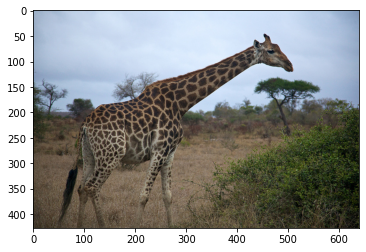

In [203]:
a_file_name = './0.jpg'
nd_array_uint8_HWC3 = mx.image.imread(a_file_name)
nd_array_f32_HWC3 = nd_array_uint8_HWC3.astype("float32")
nd_array_f3201_HWC3 = nd_array_f32_HWC3/255
plt.imshow(nd_array_f3201_HWC3.asnumpy())

# Convert to grayscale

#### Using mxnet

nd_array_f3201_HWC3.shape =  (427, 640, 3)
nd_array_f3201_HWC1.shape =  (427, 640)


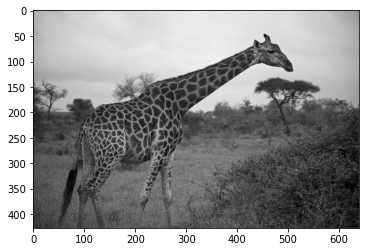

In [204]:
gray_aug = mx.image.RandomGrayAug(p=1)

# Use the RandomGrayAug Image Augment routine to convert to Grayscale
aug = mx.image.RandomGrayAug(p=1)


nd_array_f3201_HWC3 = aug(nd_array_f3201_HWC3)
# This just sets all three channels to same value.
print('nd_array_f3201_HWC3.shape = ', nd_array_f3201_HWC3.shape)

nd_array_f3201_HWC1 = nd_array_f3201_HWC3[:,:,0] # can pick any channel
print('nd_array_f3201_HWC1.shape = ', nd_array_f3201_HWC1.shape)
plt.imshow(nd_array_f3201_HWC1.asnumpy(), cmap='gray')

# Make Batch

In [205]:
in_img_batch = nd_array_f3201_HWC1.expand_dims(axis=0)

# Make Square

In [206]:
in_img_batch = make_square(in_img_batch)
in_img_batch

the_diff =  213



[[[0.66882354 0.6724706  0.6705491  ... 0.5800785  0.5879216  0.584     ]
  [0.66854906 0.6786667  0.67474514 ... 0.5781569  0.5879216  0.584     ]
  [0.67356867 0.6825883  0.6825883  ... 0.58207846 0.584      0.57615685]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]]]
<NDArray 1x640x640 @cpu(0)>

# Rotate by 90

('new_indexes = ', 
[[ 0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  6.1232343e-17]
 [ 2.0000000e+00  1.2246469e-16]
 ...
 [ 6.3700000e+02 -6.3900000e+02]
 [ 6.3800000e+02 -6.3900000e+02]
 [ 6.3900000e+02 -6.3900000e+02]]
<NDArray 409600x2 @cpu(0)>)
('new_indexes(rounded) = ', 
[[   0.    0.]
 [   1.    0.]
 [   2.    0.]
 ...
 [ 637. -639.]
 [ 638. -639.]
 [ 639. -639.]]
<NDArray 409600x2 @cpu(0)>)
('new_indexes(int) = ', 
[[   0    0]
 [   1    0]
 [   2    0]
 ...
 [ 637 -639]
 [ 638 -639]
 [ 639 -639]]
<NDArray 409600x2 @cpu(0)>)
('min_row = ', 
[0]
<NDArray 1 @cpu(0)>)
('min_col = ', 
[-639]
<NDArray 1 @cpu(0)>)
('new_indexes after shift to positive', 
[[  0 639]
 [  1 639]
 [  2 639]
 ...
 [637   0]
 [638   0]
 [639   0]]
<NDArray 409600x2 @cpu(0)>)
('orig_dims = ', 640, 640)
('new_indexes after clip', 
[[  0 639]
 [  1 639]
 [  2 639]
 ...
 [637   0]
 [638   0]
 [639   0]]
<NDArray 409600x2 @cpu(0)>)
shape of image is now  (640, 640)


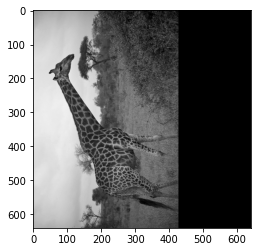

In [207]:
out_img_batch = my_rotate(in_img_batch, rotate_90)
plt.imshow(out_img_batch[0].asnumpy(), cmap='gray')
print("shape of image is now ", out_img_batch[0].shape)

# Rotate by 45

('new_indexes = ', 
[[ 0.0000000e+00  0.0000000e+00]
 [ 7.0710677e-01  7.0710677e-01]
 [ 1.4142135e+00  1.4142135e+00]
 ...
 [ 9.0226825e+02 -1.4142051e+00]
 [ 9.0297534e+02 -7.0709836e-01]
 [ 9.0368243e+02  8.4042549e-06]]
<NDArray 409600x2 @cpu(0)>)
('new_indexes(rounded) = ', 
[[  0.   0.]
 [  1.   1.]
 [  1.   1.]
 ...
 [902.  -1.]
 [903.  -1.]
 [904.   0.]]
<NDArray 409600x2 @cpu(0)>)
('new_indexes(int) = ', 
[[  0   0]
 [  1   1]
 [  1   1]
 ...
 [902  -1]
 [903  -1]
 [904   0]]
<NDArray 409600x2 @cpu(0)>)
('min_row = ', 
[0]
<NDArray 1 @cpu(0)>)
('min_col = ', 
[-452]
<NDArray 1 @cpu(0)>)
('new_indexes after shift to positive', 
[[  0 452]
 [  1 453]
 [  1 453]
 ...
 [902 451]
 [903 451]
 [904 452]]
<NDArray 409600x2 @cpu(0)>)
('orig_dims = ', 640, 640)
('new_indexes after clip', 
[[  0 452]
 [  1 453]
 [  1 453]
 ...
 [639 451]
 [639 451]
 [639 452]]
<NDArray 409600x2 @cpu(0)>)


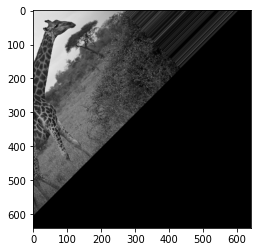

In [208]:
out_img_batch = my_rotate(in_img_batch, rotate_45, False)
plt.imshow(out_img_batch[0].asnumpy(), cmap='gray')

# Take the input image rotate it, and then remove black

('new_indexes = ', 
[[ 0.0000000e+00  0.0000000e+00]
 [ 1.0000000e+00  6.1232343e-17]
 [ 2.0000000e+00  1.2246469e-16]
 ...
 [ 6.3700000e+02 -6.3900000e+02]
 [ 6.3800000e+02 -6.3900000e+02]
 [ 6.3900000e+02 -6.3900000e+02]]
<NDArray 409600x2 @cpu(0)>)
('new_indexes(rounded) = ', 
[[   0.    0.]
 [   1.    0.]
 [   2.    0.]
 ...
 [ 637. -639.]
 [ 638. -639.]
 [ 639. -639.]]
<NDArray 409600x2 @cpu(0)>)
('new_indexes(int) = ', 
[[   0    0]
 [   1    0]
 [   2    0]
 ...
 [ 637 -639]
 [ 638 -639]
 [ 639 -639]]
<NDArray 409600x2 @cpu(0)>)
('min_row = ', 
[0]
<NDArray 1 @cpu(0)>)
('min_col = ', 
[-639]
<NDArray 1 @cpu(0)>)
('new_indexes after shift to positive', 
[[  0 639]
 [  1 639]
 [  2 639]
 ...
 [637   0]
 [638   0]
 [639   0]]
<NDArray 409600x2 @cpu(0)>)
('orig_dims = ', 640, 640)
('new_indexes after clip', 
[[  0 639]
 [  1 639]
 [  2 639]
 ...
 [637   0]
 [638   0]
 [639   0]]
<NDArray 409600x2 @cpu(0)>)


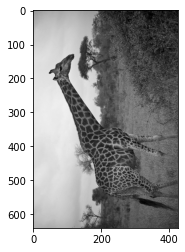

In [209]:
out_img_batch = my_rotate(in_img_batch, rotate_90)
#
# remove any rows with sum to zero
#
out_img = out_img_batch[0]
# I know the rotated image has addtional columns..  
# I also know the image is 640x640
a_cumsum_array = nd.cumsum(out_img, axis=0)[639,:]

# create a sequence array using python.  This could be done once.
Sequence_array = nd.zeros(640)
for i in range(640):
    Sequence_array[i] = i

last_column_of_data = nd.where(a_cumsum_array==0, x=a_cumsum_array, y=Sequence_array).max().astype('int64').asscalar()
last_column_of_data

orig_size_image = out_img_batch[0,:,0:last_column_of_data]
plt.imshow(orig_size_image.asnumpy(), cmap='gray')

# rotate bridge

In [234]:
# setup file system locations
# yes, this should use os file path TODO: fix it
TOP_DIR='../'
print('TOP_DIR = ', TOP_DIR)
ICY_BRIDGE_DIR = TOP_DIR + 'icy-bridge/'
print('TOP_DIR = ', ICY_BRIDGE_DIR)
MODEL_NAME = 'c6'
MODEL_TOP_DIR = ICY_BRIDGE_DIR + MODEL_NAME + '/'
print('MODEL_TOP_DIR = ', MODEL_TOP_DIR)
MODEL_RAW_IMAGE_DIR = MODEL_TOP_DIR + 'raw/'
MODEL_POST_IMAGE_DIR = MODEL_TOP_DIR + 'post_rotate_crop/'
print('MODEL_RAW_IMAGE_DIR = ', MODEL_RAW_IMAGE_DIR)
print('MODEL_POST_IMAGE_DIR = ', MODEL_POST_IMAGE_DIR)

TOP_DIR =  ../
TOP_DIR =  ../icy-bridge/
MODEL_TOP_DIR =  ../icy-bridge/c6/
MODEL_RAW_IMAGE_DIR =  ../icy-bridge/c6/raw/
MODEL_POST_IMAGE_DIR =  ../icy-bridge/c6/post_rotate_crop/


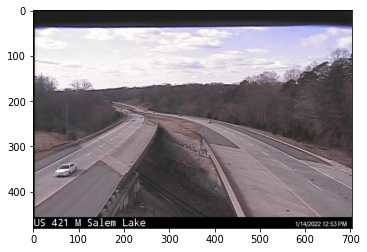

In [235]:
a_file_name = MODEL_RAW_IMAGE_DIR + 'BUS40_SALEM_20220114Z1255.jpg'
nd_array_uint8_HWC3 = mx.image.imread(a_file_name)
nd_array_f32_HWC3 = nd_array_uint8_HWC3.astype("float32")
nd_array_f3201_HWC3 = nd_array_f32_HWC3/255
plt.imshow(nd_array_f3201_HWC3.asnumpy())

#



nd_array_f3201_HWC3.shape =  (480, 704, 3)
nd_array_f3201_HWC1.shape =  (480, 704)


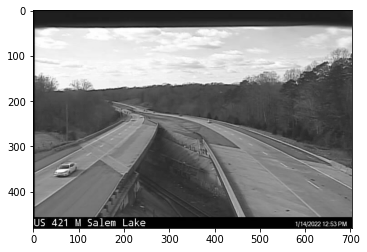

In [236]:
# make it gray
gray_aug = mx.image.RandomGrayAug(p=1)

# Use the RandomGrayAug Image Augment routine to convert to Grayscale
aug = mx.image.RandomGrayAug(p=1)


nd_array_f3201_HWC3 = aug(nd_array_f3201_HWC3)
# This just sets all three channels to same value.
print('nd_array_f3201_HWC3.shape = ', nd_array_f3201_HWC3.shape)

nd_array_f3201_HWC1 = nd_array_f3201_HWC3[:,:,0] # can pick any channel
print('nd_array_f3201_HWC1.shape = ', nd_array_f3201_HWC1.shape)
plt.imshow(nd_array_f3201_HWC1.asnumpy(), cmap='gray')

In [237]:
# make batch
in_img_batch = nd_array_f3201_HWC1.expand_dims(axis=0)

In [238]:
# make square
in_img_batch = make_square(in_img_batch, blanks=1)
in_img_batch

the_diff =  224



[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.04313726 0.         ... 0.00392157 0.00411765 0.00576471]
  [0.02745098 0.01176471 0.07843138 ... 0.00192157 0.00576471 0.00658824]
  [0.         0.         0.01176471 ... 0.00192157 0.00576471 0.00658824]]]
<NDArray 1x704x704 @cpu(0)>

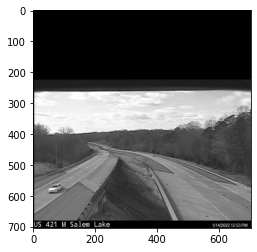

In [239]:
plt.imshow(in_img_batch[0].asnumpy(), cmap='gray')

In [240]:
# make a rotate matrix
x=0.20*math.pi

rotate_variable_angle = build_rot_matrix(x)
print('rotate variable angle nd array is ', rotate_variable_angle)

rotate variable angle nd array is  
[[ 0.809017   -0.58778524]
 [ 0.58778524  0.809017  ]]
<NDArray 2x2 @cpu(0)>


('new_indexes = ', 
[[0.0000000e+00 0.0000000e+00]
 [5.8778524e-01 8.0901700e-01]
 [1.1755705e+00 1.6180340e+00]
 ...
 [9.8077643e+02 1.5390791e+02]
 [9.8136420e+02 1.5471692e+02]
 [9.8195197e+02 1.5552594e+02]]
<NDArray 495616x2 @cpu(0)>)
('new_indexes(rounded) = ', 
[[  0.   0.]
 [  1.   1.]
 [  1.   2.]
 ...
 [981. 154.]
 [981. 155.]
 [982. 156.]]
<NDArray 495616x2 @cpu(0)>)
('new_indexes(int) = ', 
[[  0   0]
 [  1   1]
 [  1   2]
 ...
 [981 154]
 [981 155]
 [982 156]]
<NDArray 495616x2 @cpu(0)>)
('min_row = ', 
[0]
<NDArray 1 @cpu(0)>)
('min_col = ', 
[-413]
<NDArray 1 @cpu(0)>)
('new_indexes after shift to positive', 
[[  0 413]
 [  1 414]
 [  1 415]
 ...
 [981 567]
 [981 568]
 [982 569]]
<NDArray 495616x2 @cpu(0)>)
('orig_dims = ', 704, 704)
('new_indexes after clip', 
[[  0 413]
 [  1 414]
 [  1 415]
 ...
 [703 567]
 [703 568]
 [703 569]]
<NDArray 495616x2 @cpu(0)>)


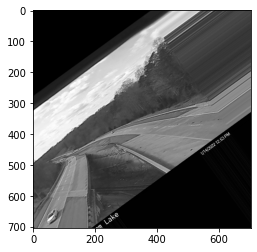

In [241]:
out_img_batch = my_rotate(in_img_batch, rotate_variable_angle, False)
plt.imshow(out_img_batch[0].asnumpy(), cmap='gray')